<a href="https://colab.research.google.com/github/Rutujaborawake29/BLINKIT-DATA-ANALYIS-PROJECT/blob/main/BLINKIT_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

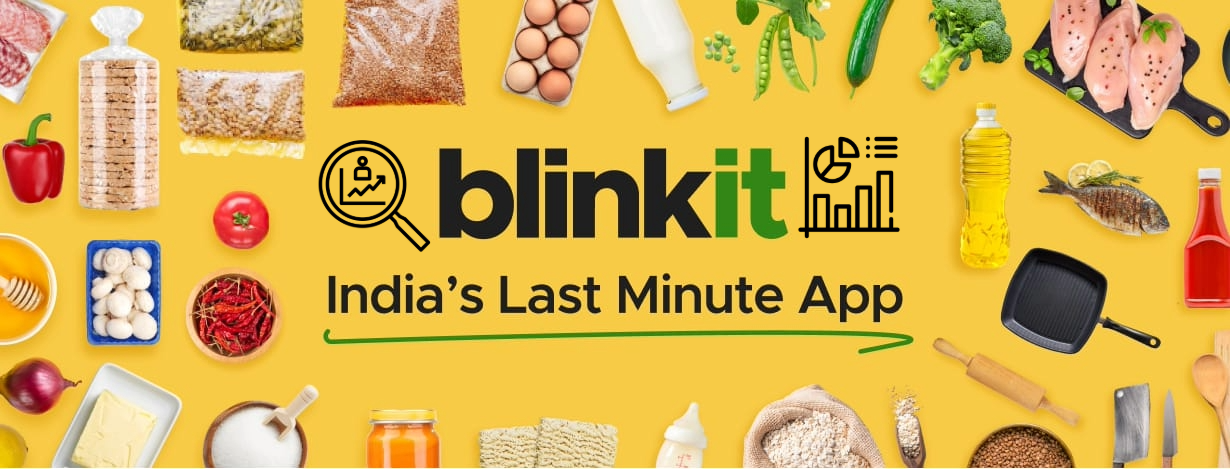

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
feedback = pd.read_csv('/content/blinkit_customer_feedback.csv')
customers = pd.read_csv('/content/blinkit_customers.csv')
order_items = pd.read_csv('/content/blinkit_order_items.csv')
inventory = pd.read_csv('/content/blinkit_inventory.csv')
inventory_new = pd.read_csv('/content/blinkit_inventoryNew.csv')
delivery = pd.read_csv('/content/blinkit_delivery_performance.csv')
orders = pd.read_csv('/content/blinkit_orders.csv')
marketing = pd.read_csv('/content/blinkit_marketing_performance.csv')
products = pd.read_csv('/content/blinkit_products.csv')


## **ORDERS**

In [16]:
orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [17]:
orders.shape

(5000, 10)

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


In [19]:
orders.isnull().sum().sum()

np.int64(0)

In [20]:
orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [21]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['promised_delivery_time'] = pd.to_datetime(orders['promised_delivery_time'])
orders['actual_delivery_time'] = pd.to_datetime(orders['actual_delivery_time'])

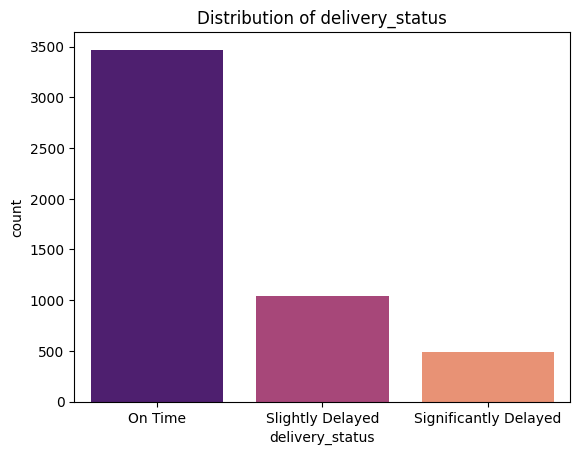

In [22]:
sns.countplot(x='delivery_status', data=orders,palette='magma')
plt.title("Distribution of delivery_status")
plt.show()

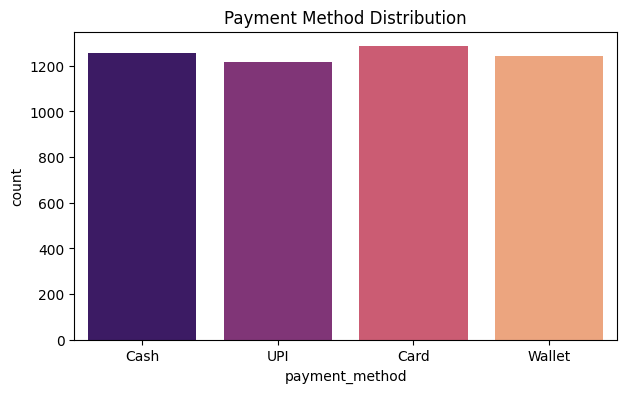

In [23]:
#Payment method
plt.figure(figsize=(7,4))
sns.countplot(x='payment_method', data=orders, palette='magma')
plt.title("Payment Method Distribution")
plt.show()

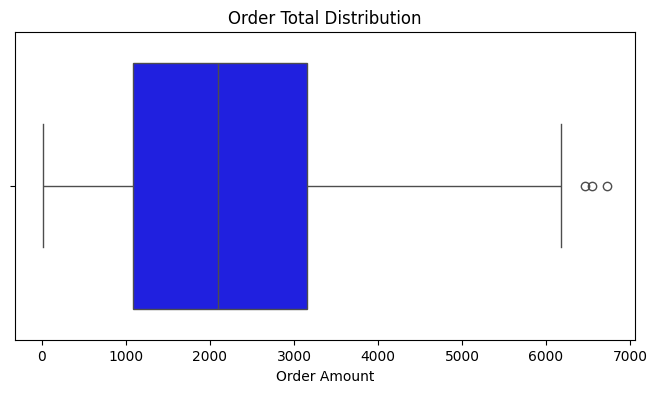

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(x=orders['order_total'], color='blue')
plt.title("Order Total Distribution")
plt.xlabel("Order Amount")
plt.show()

In [29]:
orders['year'] = orders['order_date'].dt.year

In [30]:
yearly_summary = orders.groupby('year').agg(
    total_orders=('order_id', 'count'),
    total_revenue=('order_total', 'sum'),
    avg_order_value=('order_total', 'mean')
).reset_index()

print("\n📈 Yearly Summary:\n", yearly_summary)


📈 Yearly Summary:
    year  total_orders  total_revenue  avg_order_value
0  2023          2444      5464757.6      2235.989198
1  2024          2556      5544550.9      2169.229617


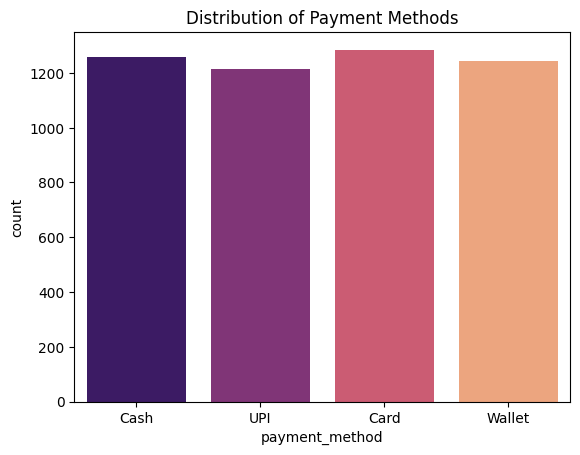

In [31]:
sns.countplot(x='payment_method', data=orders,palette='magma')
plt.title("Distribution of Payment Methods")
plt.show()

# **Customers**

In [32]:
customers.head()

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [33]:
customers.tail(2)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
2498,89051578,Zinal Natarajan,vyasfrado@example.com,911994009448,"H.No. 172, Khanna Street, Pudukkottai 610564",Alwar,586734,2024-09-06,Premium,12,1185.5
2499,78738569,Eiravati Sundaram,onkar24@example.com,914320353753,"H.No. 791, Sur Path\nBally 982559",Dewas,342448,2023-05-10,Inactive,4,376.5


In [34]:
customers.shape

(2500, 11)

In [35]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        2500 non-null   int64  
 1   customer_name      2500 non-null   object 
 2   email              2500 non-null   object 
 3   phone              2500 non-null   int64  
 4   address            2500 non-null   object 
 5   area               2500 non-null   object 
 6   pincode            2500 non-null   int64  
 7   registration_date  2500 non-null   object 
 8   customer_segment   2500 non-null   object 
 9   total_orders       2500 non-null   int64  
 10  avg_order_value    2500 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 215.0+ KB


In [36]:
customers.describe()

,customer_id,phone,pincode,total_orders,avg_order_value
count,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,4.989961e+07,9.150532e+11,497653.183200,10.491600,1102.375836
std,2.919266e+07,2.882835e+09,281167.293249,5.805533,523.043183
min,3.181300e+04,9.100132e+11,666.000000,1.000000,200.430000
25%,2.402443e+07,9.125946e+11,257079.750000,6.000000,631.817500
50%,5.000044e+07,9.150236e+11,498662.000000,10.000000,1118.650000
75%,7.595459e+07,9.176256e+11,740668.000000,16.000000,1565.400000
max,9.989390e+07,9.199988e+11,999631.000000,20.000000,1999.830000


In [37]:
customers.isnull().sum().sum()

np.int64(0)

In [38]:
customers.duplicated().sum()

np.int64(0)

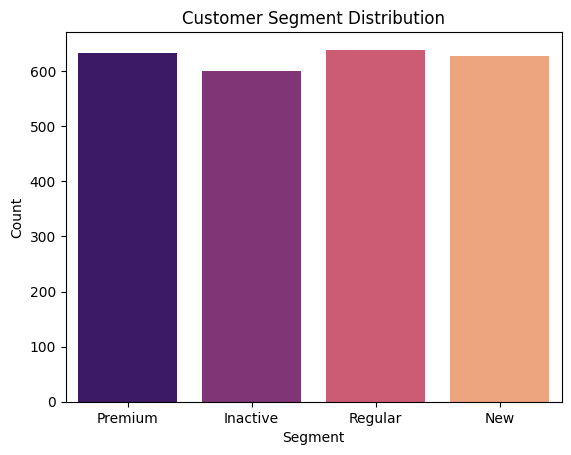

In [39]:
sns.countplot(x='customer_segment', data=customers, palette='magma')
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


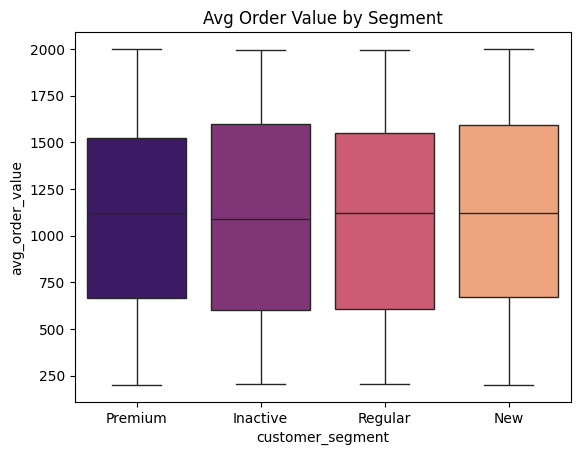

In [40]:
sns.boxplot(x='customer_segment', y='avg_order_value', data=customers, palette='magma')
plt.title('Avg Order Value by Segment')
plt.show()


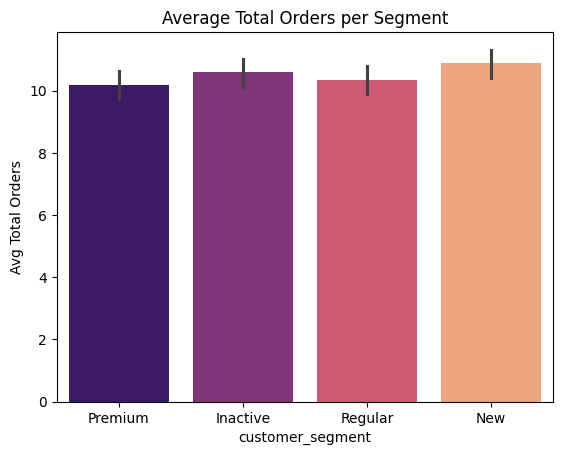

In [41]:
sns.barplot(x='customer_segment', y='total_orders', data=customers, estimator='mean',palette='magma')
plt.title('Average Total Orders per Segment')
plt.ylabel('Avg Total Orders')
plt.show()


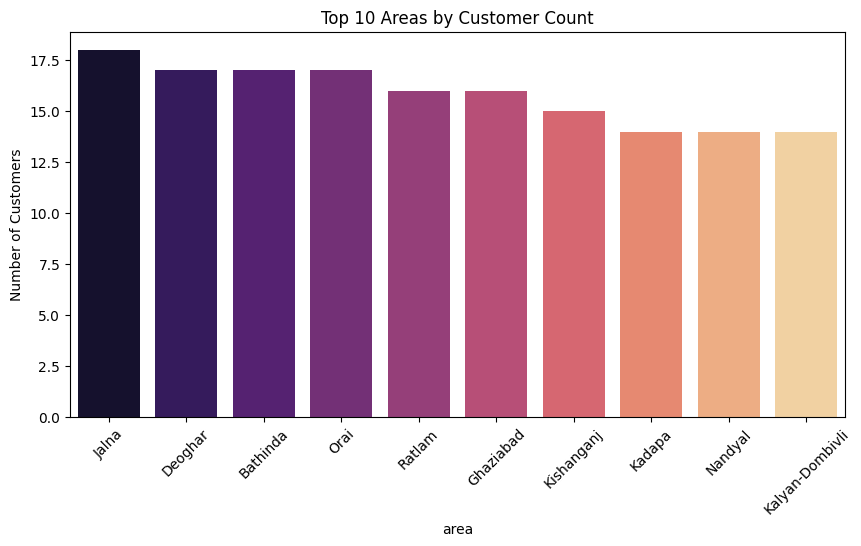

In [140]:
top_areas = customers['area'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_areas.index, y=top_areas.values,palette='magma')
plt.title('Top 10 Areas by Customer Count')
plt.xticks(rotation=45)
plt.ylabel('Number of Customers')
plt.show()


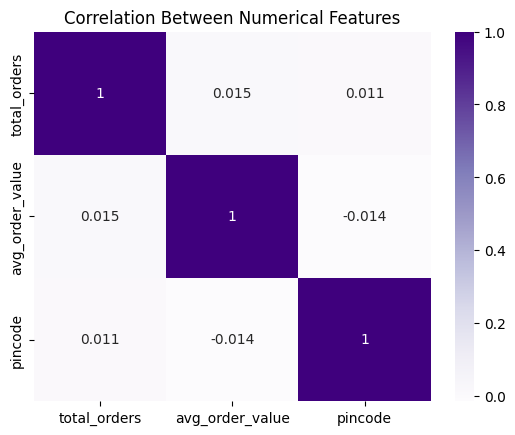

In [141]:
sns.heatmap(customers[['total_orders', 'avg_order_value', 'pincode']].corr(), annot=True, cmap='Purples')
plt.title('Correlation Between Numerical Features')
plt.show()


# **PRODUCTS**

In [44]:
products.head(2)

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65


In [45]:
products.tail(2)

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
266,673058,Cough Syrup,Pharmacy,Balan-Madan,765.76,957.20,20.0,365,30,94
267,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66


In [46]:
products.shape

(268, 10)

In [47]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


In [48]:
products.describe()

,product_id,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,514855.940299,488.356828,680.434739,27.779851,231.757463,20.388060,74.753731
std,291391.529820,298.487200,419.772224,7.458753,151.205830,5.958546,14.591535
min,4452.000000,12.320000,17.600000,15.000000,3.000000,10.000000,50.000000
25%,273697.750000,226.717500,325.150000,20.000000,90.000000,15.000000,63.750000
50%,541459.000000,442.185000,616.970000,30.000000,365.000000,21.000000,73.000000
75%,754334.000000,779.445000,1056.620000,35.000000,365.000000,25.250000,88.000000
max,993331.000000,995.980000,1633.320000,40.000000,365.000000,30.000000,100.000000


In [49]:
products.isnull().sum().sum()

np.int64(0)

In [50]:
products.duplicated().sum()

np.int64(0)

In [51]:
products.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [52]:
products['profit'] = products['mrp'] - products['price']

In [53]:
products.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,profit
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,315.98
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65,42.39
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70,70.71
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51,69.86
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55,118.17


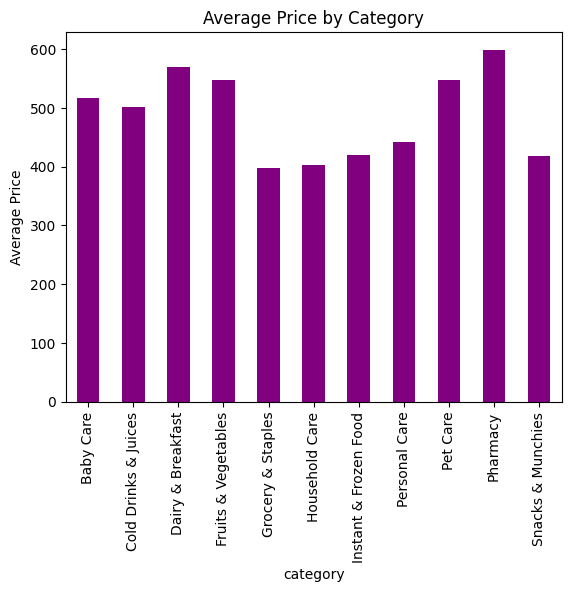

In [142]:
products.groupby('category')['price'].mean().plot(kind='bar', color='purple')
plt.ylabel('Average Price')
plt.title('Average Price by Category')
plt.show()

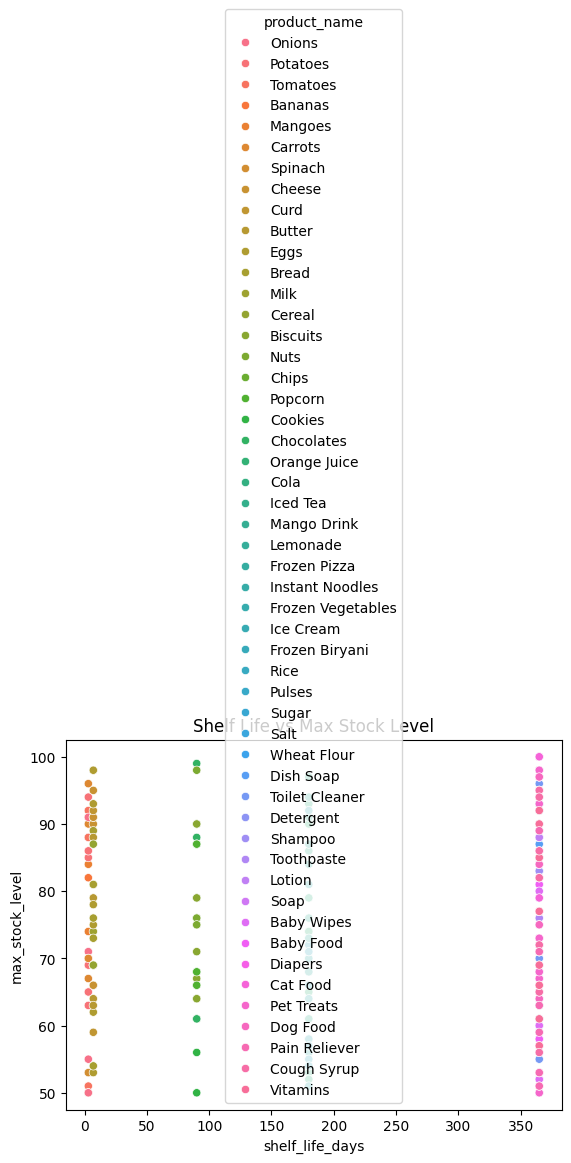

In [55]:
sns.scatterplot(data=products, x='shelf_life_days', y='max_stock_level', hue='product_name')
plt.title('Shelf Life vs Max Stock Level')
plt.show()


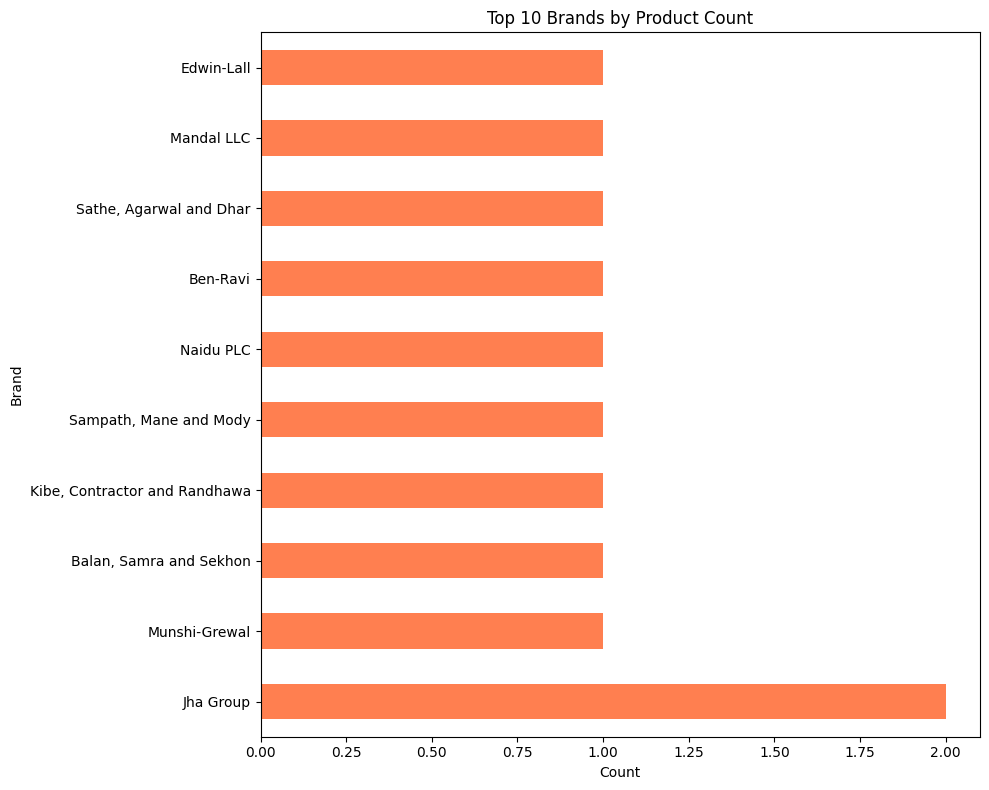

In [146]:
top_brands = products['brand'].value_counts().head(10)
top_brands.plot(kind='barh', figsize=(10, 8), color='coral')
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()



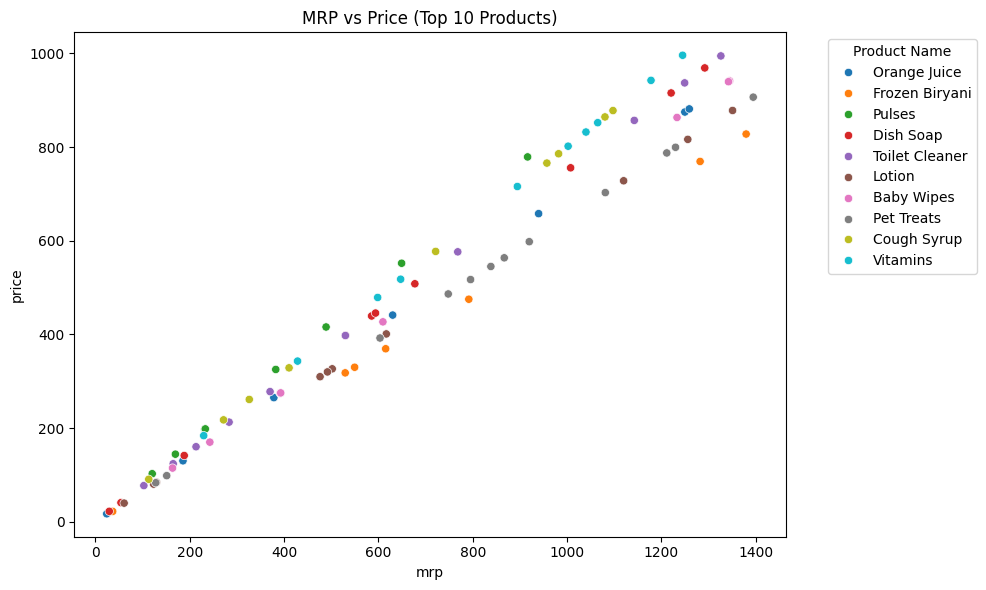

In [147]:
# Get top 10 most common products
top_products = products['product_name'].value_counts().head(10).index
filtered_df = products[products['product_name'].isin(top_products)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mrp', y='price', hue='product_name', data=filtered_df)
plt.title('MRP vs Price (Top 10 Products)')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

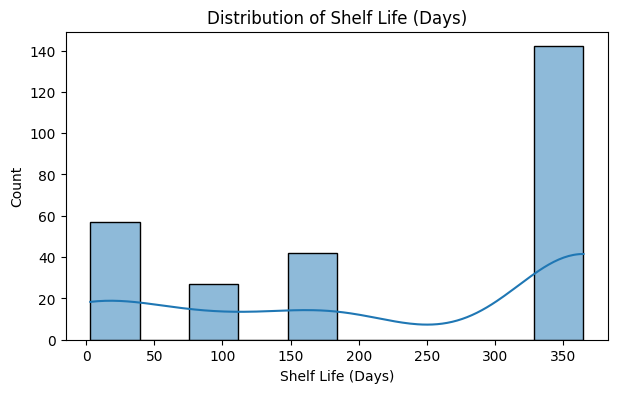

In [58]:
plt.figure(figsize=(7, 4))
sns.histplot(products['shelf_life_days'], bins=10, kde=True,palette='magma')
plt.title('Distribution of Shelf Life (Days)')
plt.xlabel('Shelf Life (Days)')
plt.ylabel('Count')
plt.show()


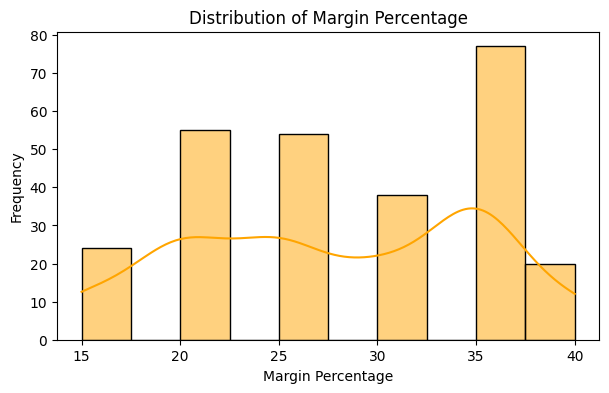

In [59]:
plt.figure(figsize=(7, 4))
sns.histplot(products['margin_percentage'], kde=True, color='orange')
plt.title('Distribution of Margin Percentage')
plt.xlabel('Margin Percentage')
plt.ylabel('Frequency')
plt.show()


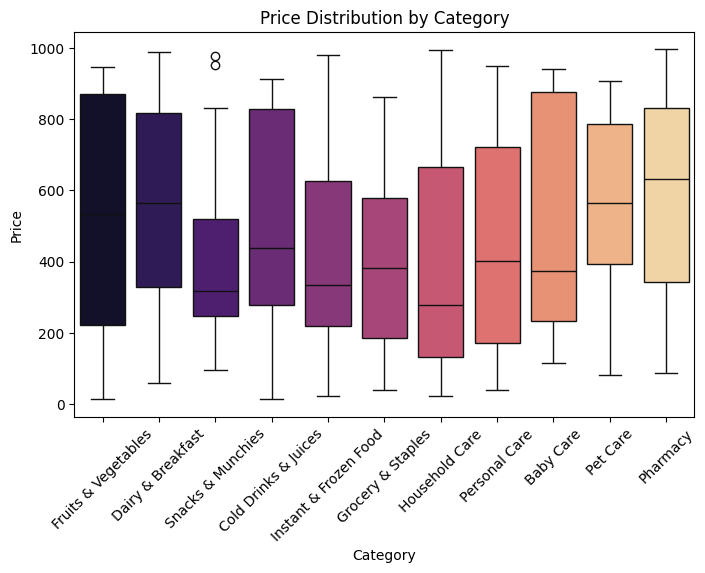

In [143]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='category', y='price', data=products, palette='magma')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


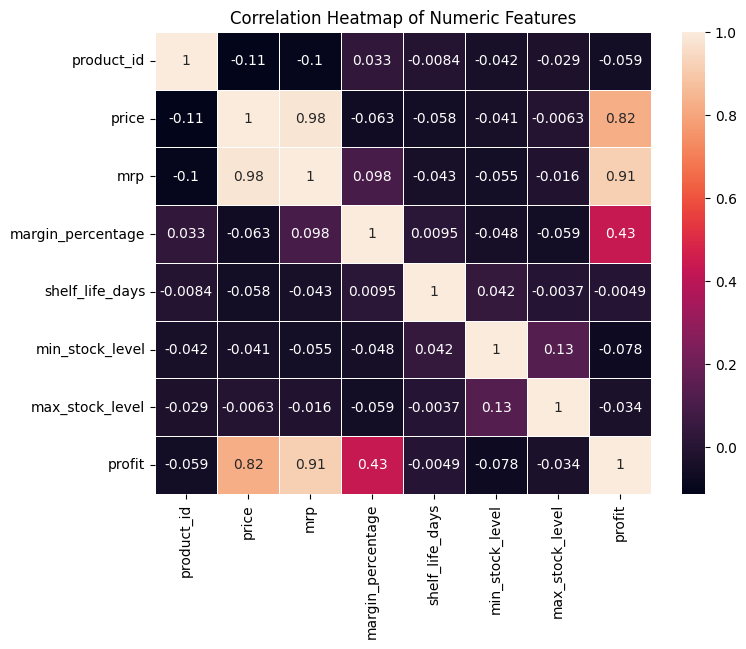

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(products.corr(numeric_only=True), annot=True,linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**FEEDBACK**

In [62]:
feedback

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20
...,...,...,...,...,...,...,...,...
4995,9024060,1669690997,62600289,3,Taste was not as expected.,Product Quality,Negative,2023-12-25
4996,4715968,8340761903,53640286,3,"Average experience, could improve.",Product Quality,Neutral,2023-11-27
4997,9621021,5936301790,87059497,4,"Average experience, could improve.",App Experience,Neutral,2024-06-21
4998,1134095,5710579377,67310893,4,"Average experience, could improve.",Delivery,Neutral,2024-06-06


In [63]:
feedback.shape

(5000, 8)

In [64]:
feedback.isnull().sum().sum()

np.int64(0)

In [65]:
feedback.duplicated().sum()

np.int64(0)

In [66]:
feedback['feedback_date'] = pd.to_datetime(feedback['feedback_date'])

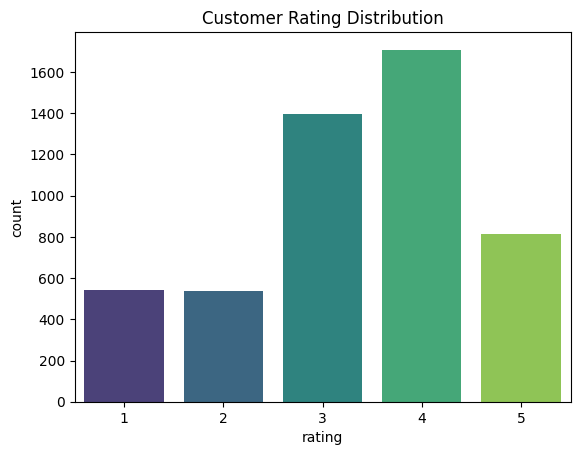

In [67]:
sns.countplot(x='rating', data=feedback, palette='viridis')
plt.title("Customer Rating Distribution")
plt.show()


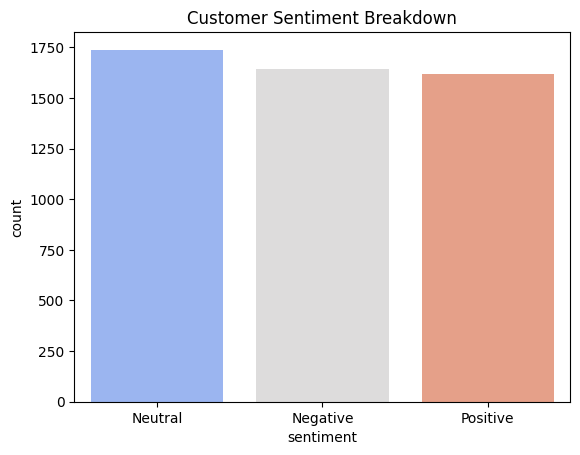

In [68]:
sns.countplot(x='sentiment', data=feedback, palette='coolwarm')
plt.title("Customer Sentiment Breakdown")
plt.show()


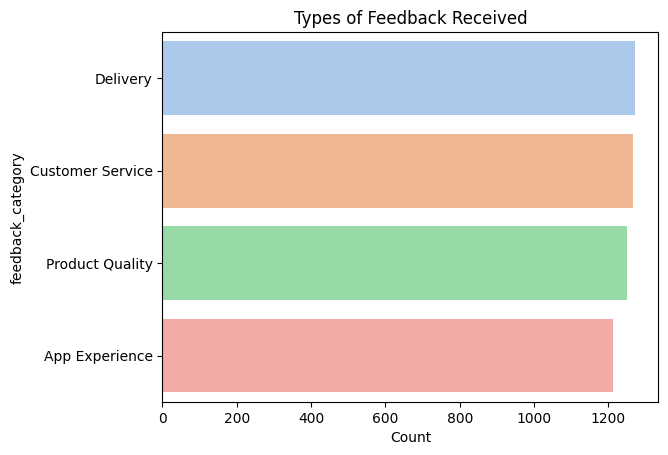

In [69]:
sns.countplot(y='feedback_category', data=feedback, order=feedback['feedback_category'].value_counts().index, palette='pastel')
plt.title("Types of Feedback Received")
plt.xlabel("Count")
plt.show()


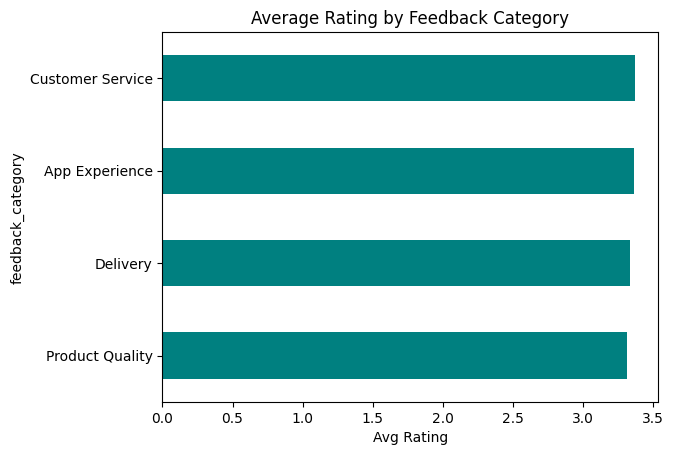

In [70]:
avg_rating = feedback.groupby('feedback_category')['rating'].mean().sort_values()
avg_rating.plot(kind='barh', color='teal')
plt.title("Average Rating by Feedback Category")
plt.xlabel("Avg Rating")
plt.show()


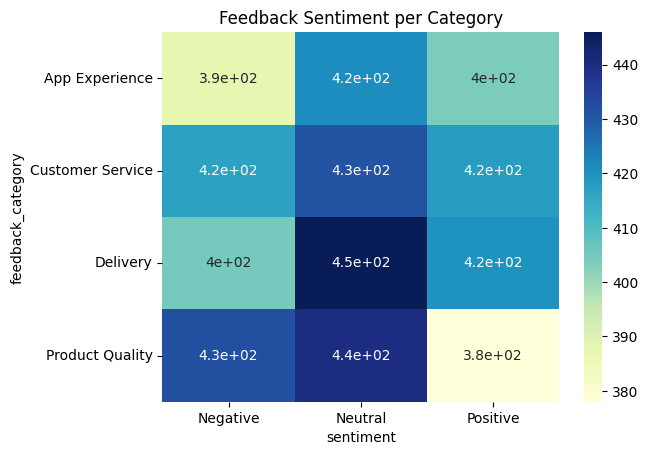

In [71]:
cross = pd.crosstab(feedback['feedback_category'], feedback['sentiment'])
sns.heatmap(cross, annot=True, cmap='YlGnBu')
plt.title("Feedback Sentiment per Category")
plt.show()


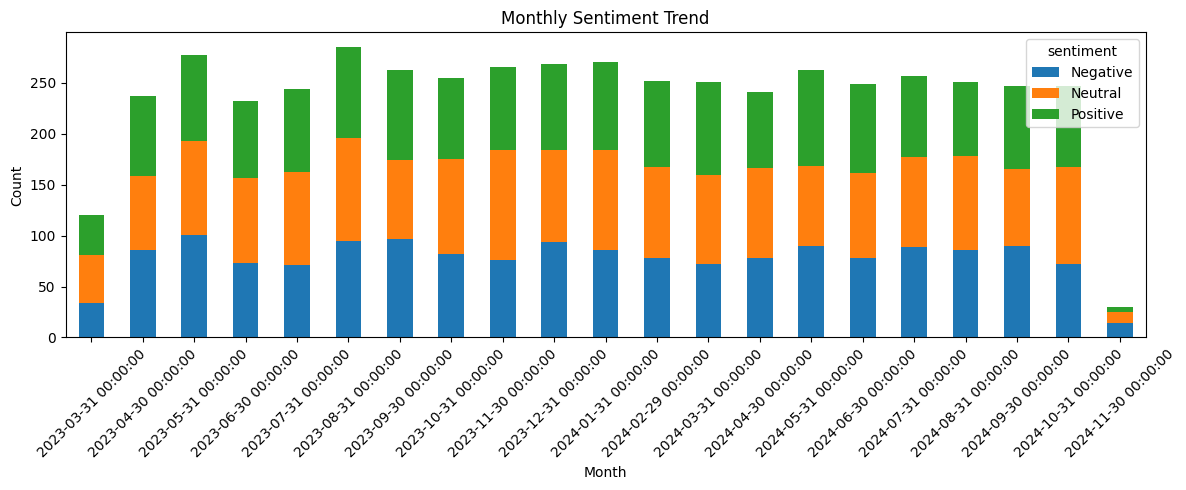

In [72]:
feedback.set_index('feedback_date').resample('M')['sentiment'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("Monthly Sentiment Trend")
plt.ylabel("Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **delivery**

In [73]:
delivery.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


In [74]:
delivery.tail()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
4995,1669690997,90914,2023-12-25 16:05:20,2023-12-25 16:10:20,5.0,1.86,On Time,Traffic
4996,8340761903,27952,2023-11-27 09:38:43,2023-11-27 09:36:43,-2.0,3.31,On Time,NaN
4997,5936301790,9590,2024-06-21 19:23:09,2024-06-21 19:26:09,3.0,2.44,On Time,Traffic
4998,5710579377,29940,2024-06-06 15:12:13,2024-06-06 15:10:13,-2.0,1.76,On Time,NaN
4999,2494813730,32851,2023-08-23 12:20:18,2023-08-23 12:21:18,1.0,2.70,On Time,Traffic


In [75]:
delivery.shape

(5000, 8)

In [76]:
delivery.isnull().sum()

,0
order_id,0
delivery_partner_id,0
promised_time,0
actual_time,0
delivery_time_minutes,0
distance_km,0
delivery_status,0
reasons_if_delayed,1902


In [77]:
delivery['reasons_if_delayed']=delivery['reasons_if_delayed'].fillna('Unknown')

In [78]:
delivery.isnull().sum()

,0
order_id,0
delivery_partner_id,0
promised_time,0
actual_time,0
delivery_time_minutes,0
distance_km,0
delivery_status,0
reasons_if_delayed,0


In [79]:
delivery.duplicated().sum()

np.int64(0)

# **inventory**

In [80]:
inventory.head()

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2


In [81]:
inventory.tail()

,product_id,date,stock_received,damaged_stock
75167,298985,05-11-2024,3,0
75168,679284,05-11-2024,3,0
75169,240179,05-11-2024,3,0
75170,673058,05-11-2024,3,2
75171,114414,05-11-2024,3,0


In [82]:
inventory.shape

(75172, 4)

In [83]:
inventory.duplicated().sum()

np.int64(0)

In [84]:
inventory.describe()

,product_id,stock_received,damaged_stock
count,75172.000000,75172.000000,75172.000000
mean,514290.353097,1.962513,1.067791
std,291277.971875,1.639961,0.997706
min,4452.000000,0.000000,0.000000
25%,272170.000000,0.000000,0.000000
50%,542300.000000,3.000000,2.000000
75%,753354.000000,3.000000,2.000000
max,993331.000000,4.000000,2.000000


In [85]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75172 entries, 0 to 75171
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      75172 non-null  int64 
 1   date            75172 non-null  object
 2   stock_received  75172 non-null  int64 
 3   damaged_stock   75172 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ MB


In [86]:
inventory.isnull().sum()

,0
product_id,0
date,0
stock_received,0
damaged_stock,0


In [87]:
inventory['date'] = pd.to_datetime(inventory['date'], format='%d-%m-%Y')

In [88]:
inventory['damage_rate'] = (inventory['damaged_stock'] / inventory['stock_received']).fillna(0)

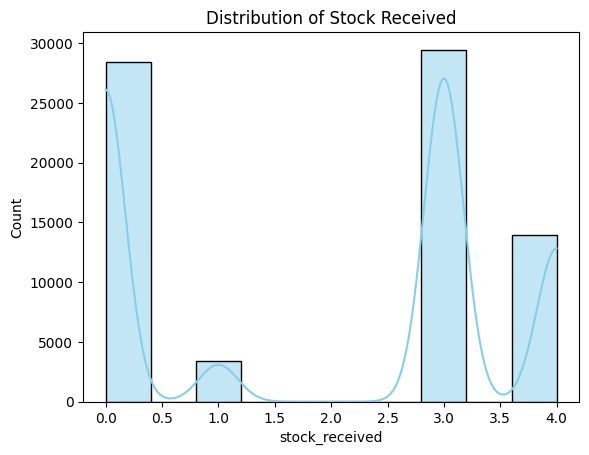

In [89]:
sns.histplot(inventory['stock_received'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Stock Received")
plt.show()


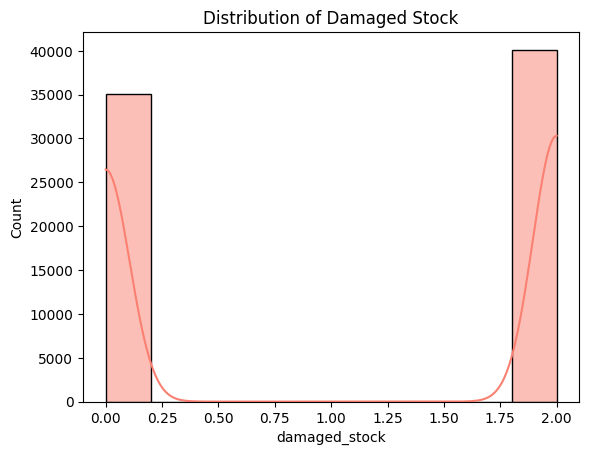

In [90]:
sns.histplot(inventory['damaged_stock'], bins=10, kde=True, color='salmon')
plt.title("Distribution of Damaged Stock")
plt.show()


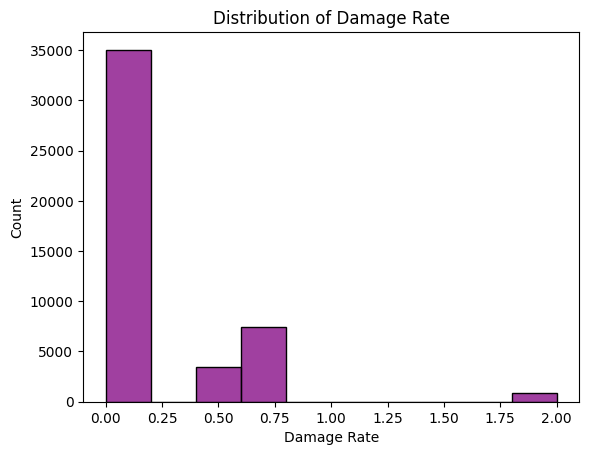

In [91]:
sns.histplot(inventory['damage_rate'], bins=10, color='purple')
plt.title("Distribution of Damage Rate")
plt.xlabel("Damage Rate")
plt.show()


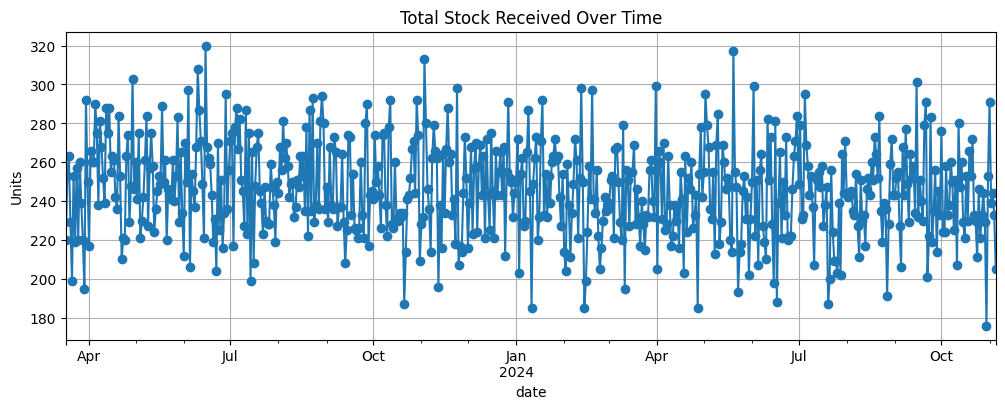

In [92]:
inventory.groupby('date')['stock_received'].sum().plot(figsize=(12,4), marker='o')
plt.title("Total Stock Received Over Time")
plt.ylabel("Units")
plt.grid()
plt.show()


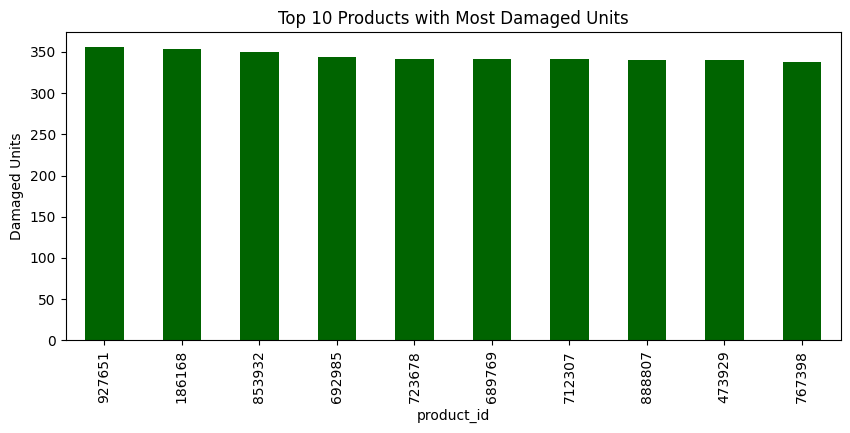

In [93]:
top_damaged = inventory.groupby('product_id')['damaged_stock'].sum().sort_values(ascending=False).head(10)
top_damaged.plot(kind='bar', figsize=(10,4), color='darkgreen')
plt.title("Top 10 Products with Most Damaged Units")
plt.ylabel("Damaged Units")
plt.show()


# **inventory_new**

In [94]:
inventory_new.head()

,product_id,date,stock_received,damaged_stock
0,153019,Mar-23,4,1
1,848226,Mar-23,4,1
2,965755,Mar-23,1,0
3,39154,Mar-23,4,0
4,34186,Mar-23,3,1


In [95]:
inventory_new.tail()

,product_id,date,stock_received,damaged_stock
18100,837480,Nov-24,3,0
18101,56589,Nov-24,3,0
18102,679284,Nov-24,3,0
18103,673058,Nov-24,3,0
18104,114414,Nov-24,3,0


In [96]:
inventory_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18105 entries, 0 to 18104
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      18105 non-null  int64 
 1   date            18105 non-null  object
 2   stock_received  18105 non-null  int64 
 3   damaged_stock   18105 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 565.9+ KB


In [97]:
inventory_new.describe()

,product_id,stock_received,damaged_stock
count,18105.000000,18105.000000,18105.000000
mean,514273.410163,1.589561,0.061254
std,290295.868498,0.797942,0.265387
min,4452.000000,1.000000,0.000000
25%,274207.000000,1.000000,0.000000
50%,540618.000000,1.000000,0.000000
75%,753354.000000,2.000000,0.000000
max,993331.000000,4.000000,7.000000


In [98]:
inventory_new.shape

(18105, 4)

In [99]:
inventory_new.duplicated().sum()

np.int64(7359)

In [100]:
inventory_new.isnull().sum()

,0
product_id,0
date,0
stock_received,0
damaged_stock,0


In [101]:
inventory_new['date'] = pd.to_datetime(inventory_new['date'], format='%b-%y')

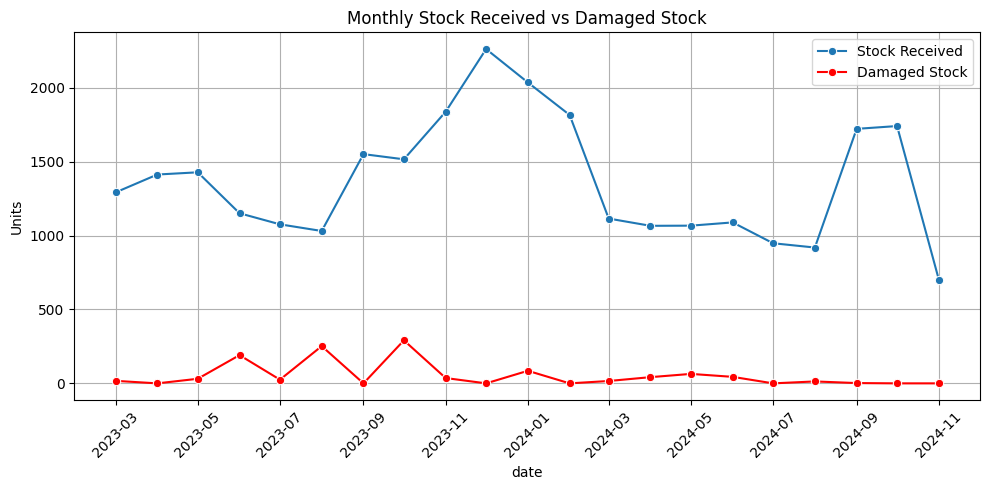

In [102]:
monthly_stock = inventory_new.groupby('date')[['stock_received', 'damaged_stock']].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='stock_received', data=monthly_stock, label='Stock Received', marker='o')
sns.lineplot(x='date', y='damaged_stock', data=monthly_stock, label='Damaged Stock', marker='o', color='red')
plt.title('Monthly Stock Received vs Damaged Stock')
plt.ylabel('Units')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


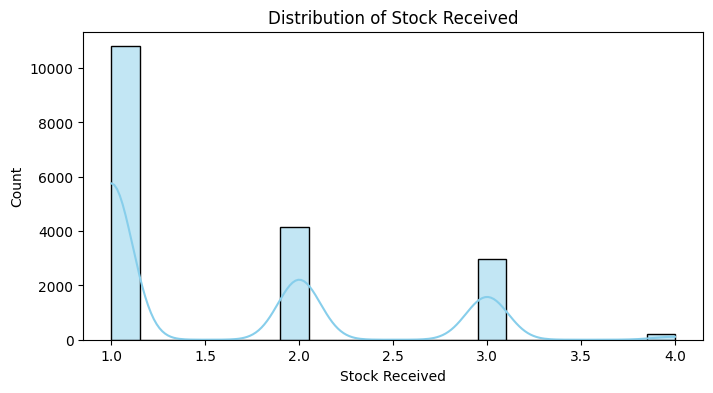

In [103]:
plt.figure(figsize=(8, 4))
sns.histplot(inventory_new['stock_received'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Stock Received')
plt.xlabel('Stock Received')
plt.show()


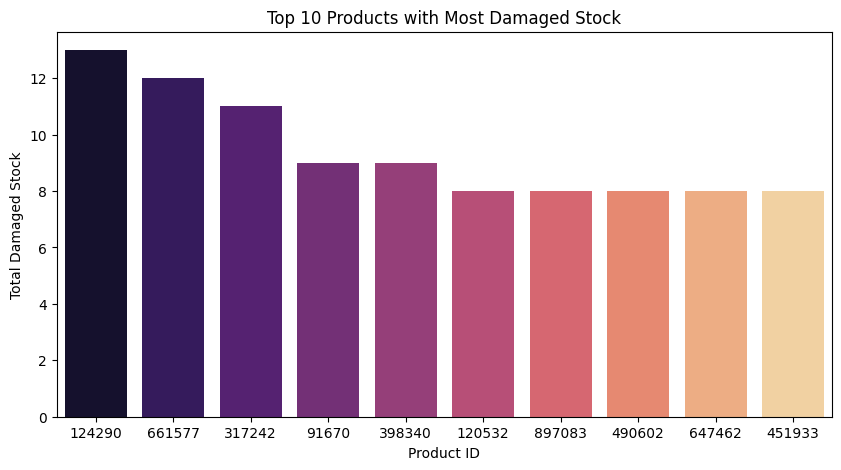

In [104]:
top_damaged = inventory_new.groupby('product_id')['damaged_stock'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_damaged.index.astype(str), y=top_damaged.values, palette='magma')
plt.title('Top 10 Products with Most Damaged Stock')
plt.xlabel('Product ID')
plt.ylabel('Total Damaged Stock')
plt.show()


# **marketing**

In [105]:
marketing.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


In [106]:
marketing.tail()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
5395,381623,Membership Drive,2023-03-17,New Users,Email,8331,809,92,2363.07,3710.79,1.64
5396,493317,Category Promotion,2023-03-17,Premium,Social Media,5216,860,34,3922.53,7701.25,2.01
5397,879292,App Push Notification,2023-03-17,All,App,8480,734,20,1990.75,6650.41,3.98
5398,461129,Email Campaign,2023-03-17,New Users,Email,3569,568,10,4246.47,5880.42,2.50
5399,282514,Referral Program,2023-03-17,New Users,Social Media,5967,439,78,1511.93,8322.01,3.08


In [107]:
marketing.shape

(5400, 11)

In [108]:
marketing.describe()

,campaign_id,impressions,clicks,conversions,spend,revenue_generated,roas
count,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,501315.219074,5460.668519,550.767593,55.192222,3022.192267,5961.742106,2.740711
std,287611.524258,2571.779820,260.080051,26.150173,1148.732680,2322.242911,0.722986
min,243.000000,1002.000000,100.000000,10.000000,1000.630000,2003.100000,1.500000
25%,249200.000000,3231.500000,322.000000,32.000000,2029.070000,3907.240000,2.120000
50%,505012.500000,5457.500000,555.000000,55.000000,3042.485000,5935.940000,2.725000
75%,752219.250000,7676.250000,772.000000,78.000000,4011.572500,7973.712500,3.370000
max,999950.000000,9999.000000,1000.000000,100.000000,4997.550000,9999.540000,4.000000


In [109]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB


In [110]:
marketing.duplicated().sum()

np.int64(0)

In [111]:
marketing.isnull().sum().sum()

np.int64(0)

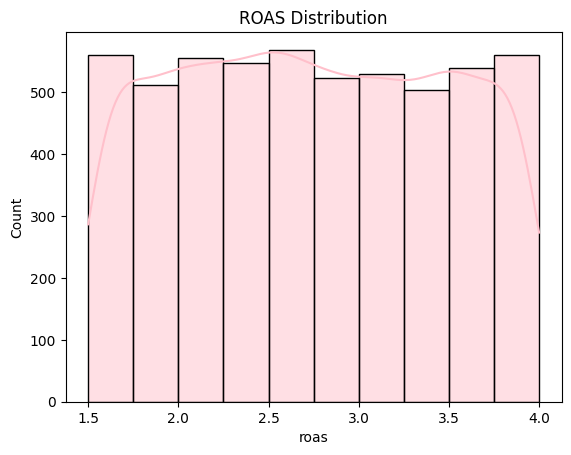

In [112]:
sns.histplot(marketing['roas'], bins=10, color='pink', kde=True)
plt.title("ROAS Distribution")
plt.show()


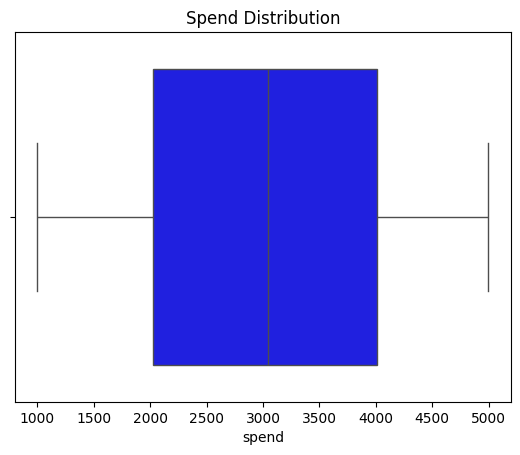

In [113]:
sns.boxplot(x=marketing['spend'], color='blue')
plt.title("Spend Distribution")
plt.show()


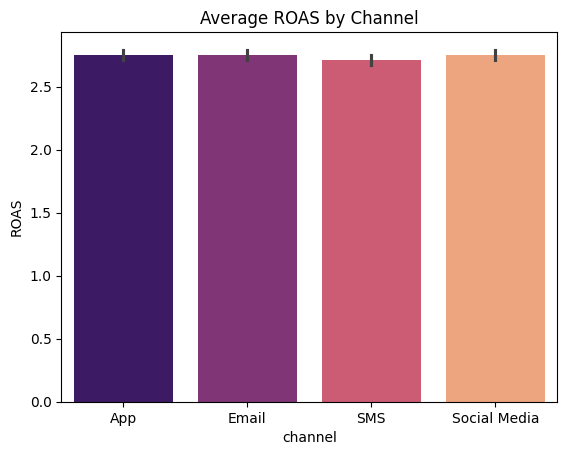

In [114]:
sns.barplot(data=marketing, x='channel', y='roas', estimator='mean', palette='magma')
plt.title("Average ROAS by Channel")
plt.ylabel("ROAS")
plt.show()


In [115]:
marketing['ctr'] = (marketing['clicks'] / marketing['impressions']).round(3)
marketing['cvr'] = (marketing['conversions'] / marketing['clicks']).replace([np.inf, np.nan], 0).round(3)


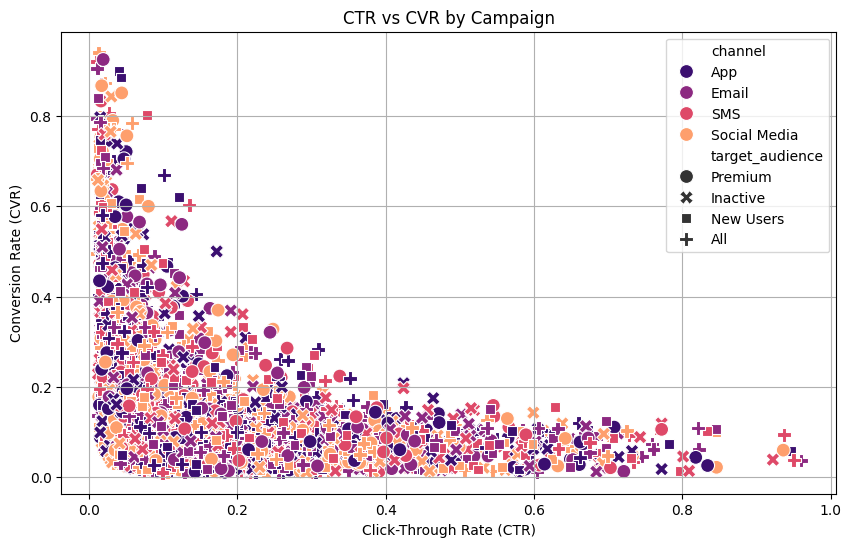

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=marketing, x='ctr', y='cvr', hue='channel', style='target_audience', s=100,palette='magma')
plt.title("CTR vs CVR by Campaign")
plt.xlabel("Click-Through Rate (CTR)")
plt.ylabel("Conversion Rate (CVR)")
plt.grid()
plt.show()


In [117]:
top_campaigns = marketing.sort_values(by='roas', ascending=False).head(5)
worst_campaigns = marketing.sort_values(by='roas').head(5)

print("🔥 Top 5 Campaigns by ROAS:")
print(top_campaigns[['campaign_name', 'roas', 'spend', 'revenue_generated']])

print("\n❌ Worst 5 Campaigns by ROAS:")
print(worst_campaigns[['campaign_name', 'roas', 'spend', 'revenue_generated']])


🔥 Top 5 Campaigns by ROAS:
          campaign_name  roas    spend  revenue_generated
2448  New User Discount   4.0  2477.25            4434.61
5276     Festival Offer   4.0  1318.85            2947.82
97       Email Campaign   4.0  3599.79            4311.79
667     Weekend Special   4.0  2683.84            2645.40
4338  New User Discount   4.0  4683.64            6103.83

❌ Worst 5 Campaigns by ROAS:
         campaign_name  roas    spend  revenue_generated
1763  Referral Program   1.5  3860.49            5079.09
1965        Flash Sale   1.5  1958.70            8191.12
2244        Flash Sale   1.5  3318.46            5605.21
1547  Referral Program   1.5  3121.00            9462.12
1295  Referral Program   1.5  4731.42            7969.46


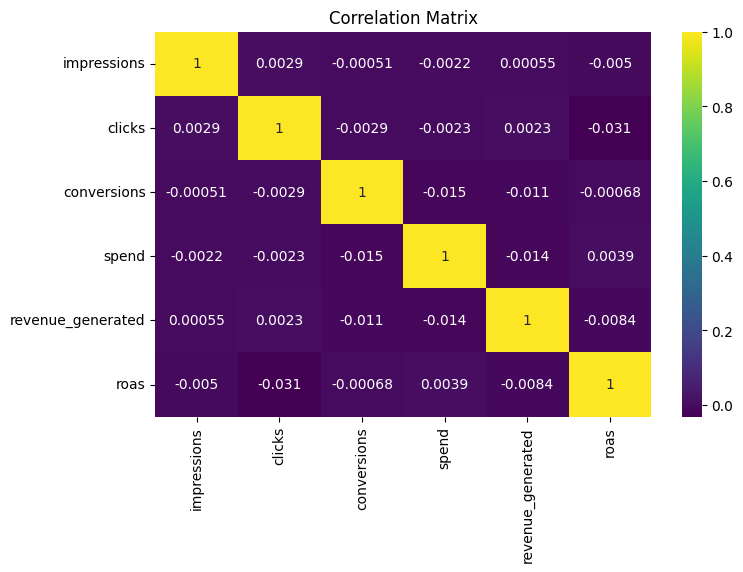

In [118]:
plt.figure(figsize=(8,5))
sns.heatmap(marketing[['impressions', 'clicks', 'conversions', 'spend', 'revenue_generated', 'roas']].corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()


In [119]:

print('feedback',feedback.columns)
print('customers',customers.columns)
print('order_items',order_items.columns)
print('inventory',inventory.columns)
print('inventory_new',inventory_new.columns)
print('delivery',delivery.columns)
print('orders',orders.columns)
print('marketing',marketing.columns)
print('products',products.columns)

feedback Index(['feedback_id', 'order_id', 'customer_id', 'rating', 'feedback_text',
       'feedback_category', 'sentiment', 'feedback_date'],
      dtype='object')
customers Index(['customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'],
      dtype='object')
order_items Index(['order_id', 'product_id', 'quantity', 'unit_price'], dtype='object')
inventory Index(['product_id', 'date', 'stock_received', 'damaged_stock', 'damage_rate'], dtype='object')
inventory_new Index(['product_id', 'date', 'stock_received', 'damaged_stock'], dtype='object')
delivery Index(['order_id', 'delivery_partner_id', 'promised_time', 'actual_time',
       'delivery_time_minutes', 'distance_km', 'delivery_status',
       'reasons_if_delayed'],
      dtype='object')
orders Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'or

In [120]:
merged_df = pd.merge(orders, order_items, on='order_id', how='inner')

print("Shape after Merge 1:", merged_df.shape)
print("Missing values:\n", merged_df.isnull().sum().sum())

Shape after Merge 1: (5000, 15)
Missing values:
 0


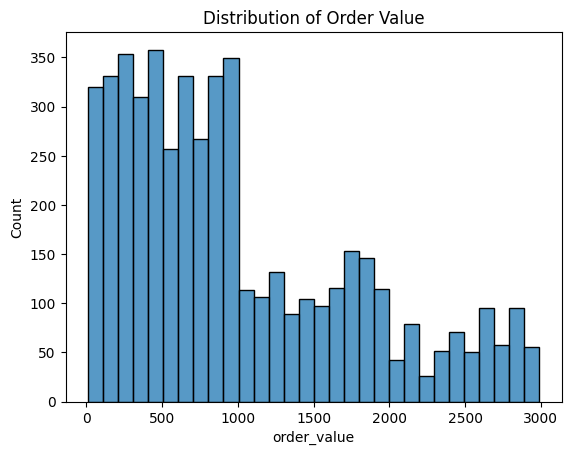

In [123]:
# ➤ EDA 1: Order value distribution
merged_df['order_value'] = merged_df['quantity'] * merged_df['unit_price']
sns.histplot(merged_df['order_value'], bins=30)
plt.title('Distribution of Order Value')
plt.show()

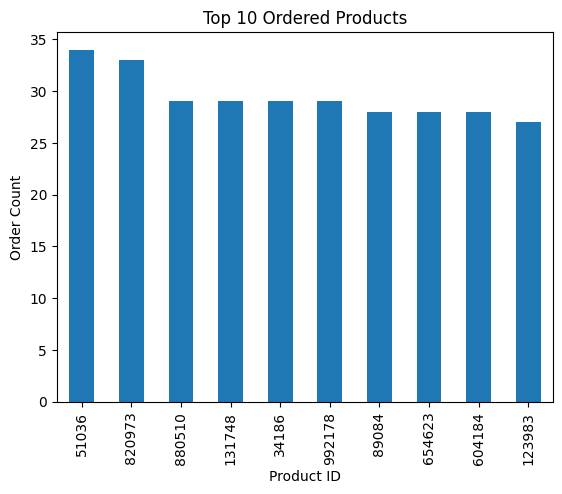

In [124]:
# ➤ EDA 2: Top ordered products
top_products = merged_df['product_id'].value_counts().head(10)
top_products.plot(kind='bar', title='Top 10 Ordered Products')
plt.xlabel('Product ID')
plt.ylabel('Order Count')
plt.show()

In [125]:
merged_df = pd.merge(merged_df, customers, on='customer_id', how='left')

print("Shape after Merge 2:", merged_df.shape)
print("Missing values:\n", merged_df.isnull().sum().sum())

Shape after Merge 2: (5000, 26)
Missing values:
 0


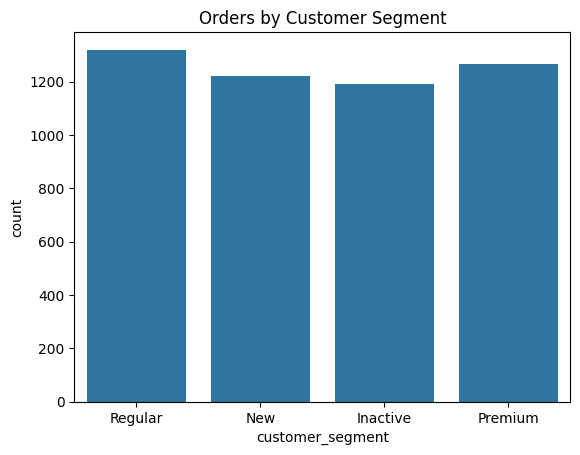

In [126]:
# ➤ EDA 3: Orders by customer segment
sns.countplot(data=merged_df, x='customer_segment')
plt.title('Orders by Customer Segment')
plt.show()

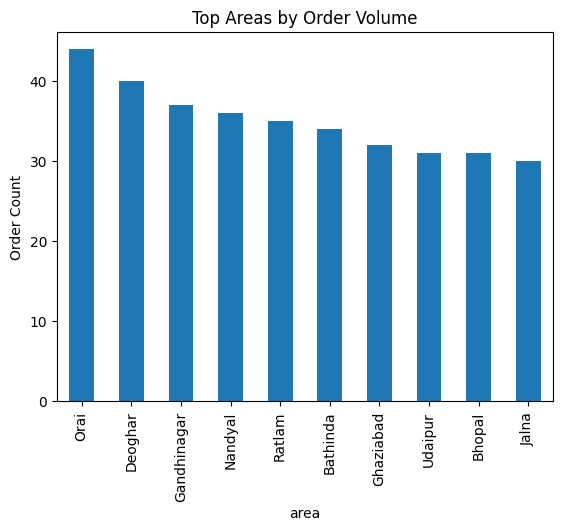

In [127]:
# ➤ EDA 4: Customer locations
merged_df['area'].value_counts().head(10).plot(kind='bar', title='Top Areas by Order Volume')
plt.ylabel('Order Count')
plt.show()

In [128]:
merged_df = pd.merge(merged_df, delivery, on='order_id', how='left')

print("Shape after Merge 3:", merged_df.shape)
print("Missing values:\n", merged_df.isnull().sum().sum())

Shape after Merge 3: (5000, 33)
Missing values:
 0


In [129]:
merged_df.isnull().sum()

,0
order_id,0
customer_id,0
order_date,0
promised_delivery_time,0
actual_delivery_time,0
delivery_status_x,0
order_total,0
payment_method,0
delivery_partner_id_x,0
store_id,0


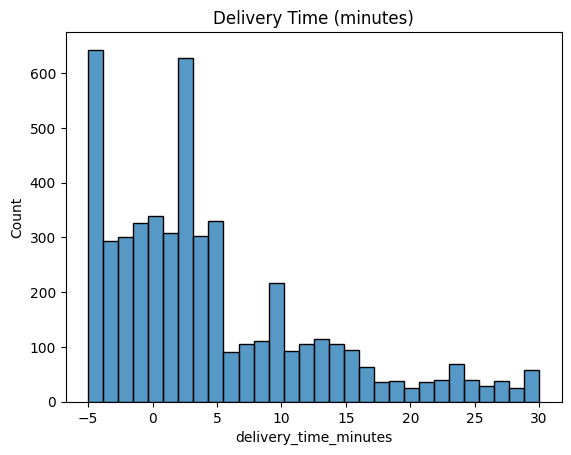

In [130]:
# ➤ EDA 5: Delivery time distribution
sns.histplot(merged_df['delivery_time_minutes'].dropna(), bins=30)
plt.title('Delivery Time (minutes)')
plt.show()


In [131]:
# ➤ EDA 6: Delivery status
sns.countplot(data=merged_df, x='delivery_status')
plt.title('Delivery Status Distribution')
plt.show()

ValueError: Could not interpret value `delivery_status` for `x`. An entry with this name does not appear in `data`.

In [132]:
merged_df = pd.merge(merged_df, feedback, on='order_id', how='left')

print("Shape after Merge 4:", merged_df.shape)
print("Missing values:\n", merged_df.isnull().sum())

Shape after Merge 4: (5000, 40)
Missing values:
 order_id                  0
customer_id_x             0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status_x         0
order_total               0
payment_method            0
delivery_partner_id_x     0
store_id                  0
order_year                0
year                      0
product_id                0
quantity                  0
unit_price                0
order_value               0
customer_name             0
email                     0
phone                     0
address                   0
area                      0
pincode                   0
registration_date         0
customer_segment          0
total_orders              0
avg_order_value           0
delivery_partner_id_y     0
promised_time             0
actual_time               0
delivery_time_minutes     0
distance_km               0
delivery_status_y         0
reasons_if_delayed        0
feedback_id               0

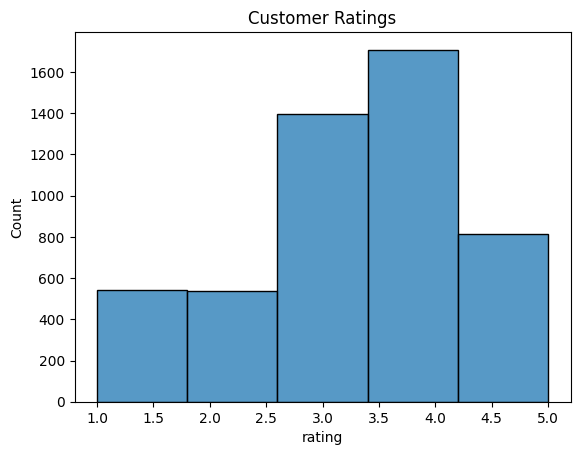

In [133]:
sns.histplot(merged_df['rating'].dropna(), bins=5)
plt.title('Customer Ratings')
plt.show()

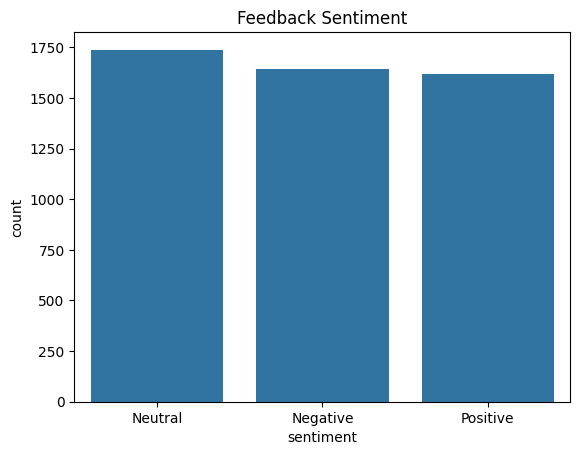

In [134]:
sns.countplot(data=merged_df, x='sentiment')
plt.title('Feedback Sentiment')
plt.show()

In [135]:
merged_df = pd.merge(merged_df, products, on='product_id', how='left')

print("Shape after Merge 5:", merged_df.shape)
print("Missing values:\n", merged_df.isnull().sum().sum())

Shape after Merge 5: (5000, 50)
Missing values:
 0


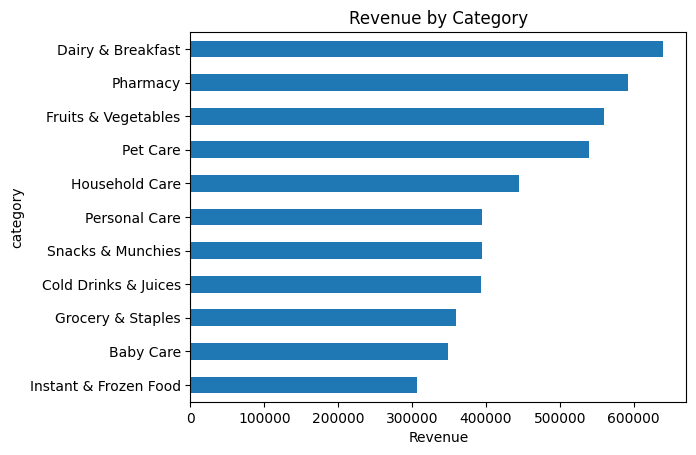

In [136]:
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price']
category_revenue = merged_df.groupby('category')['revenue'].sum().sort_values()
category_revenue.plot(kind='barh', title='Revenue by Category')
plt.xlabel('Revenue')
plt.show()

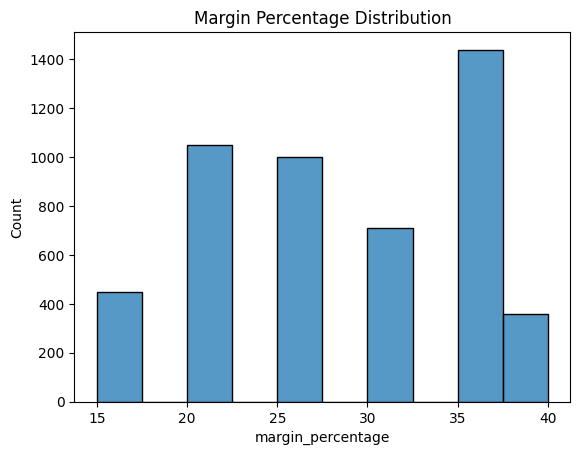

In [137]:
# ➤ EDA 10: Margin distribution
sns.histplot(merged_df['margin_percentage'], bins=10)
plt.title('Margin Percentage Distribution')
plt.show()

In [138]:
merged_df = pd.merge(merged_df, inventory, on='product_id', how='left')

print("Shape after Merge 6:", merged_df.shape)
print("Missing values:\n", merged_df.isnull().sum().sum())

Shape after Merge 6: (1407882, 55)
Missing values:
 0


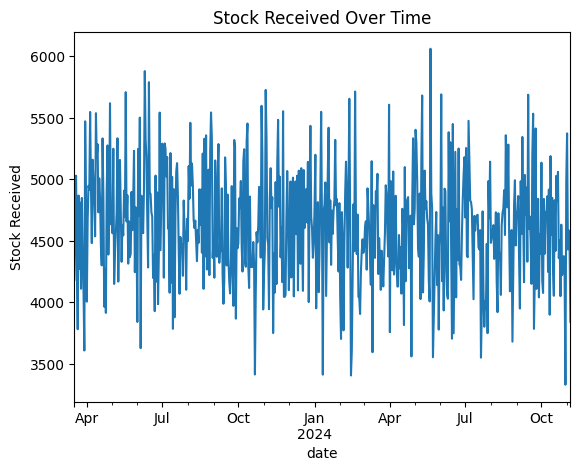

In [139]:
if 'date' in merged_df.columns:
    merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
    stock_trend = merged_df.groupby('date')['stock_received'].sum()
    stock_trend.plot(title='Stock Received Over Time')
    plt.ylabel('Stock Received')
    plt.show()